<a href="https://colab.research.google.com/github/likhith005/Generative-AI/blob/master/Raj_GeneAI_Lab_2_Autoencoder_with_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Utilize Autoencoders in conjunction with a dataset like MNIST to generate images and evaluate the quality of the generated images.



https://shorturl.at/dqrtQ

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Dense, Conv2D
from tensorflow.keras.layers import Conv2DTranspose, Flatten, Reshape

In [ ]:
# Load MNIST dataset
(train_data, _), (_, _) = mnist.load_data()
# Normalize pixel values to be between 0 and 1
train_data = train_data.astype('float32') / 255.0
# Add channel dimension for convolutional layers
train_data = np.expand_dims(train_data, axis=-1)
# Define the autoencoder model for image generation
input_shape = (28, 28, 1)
latent_dim = 32

##### Create Encoder Decoder Model


In [ ]:
# Encoder
encoder = Sequential([
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=input_shape),
    Conv2D(64, (3, 3), activation='relu', padding='same', strides=2),
    Conv2D(128, (3, 3), activation='relu', padding='same', strides=2),
    Flatten(),
    Dense(latent_dim, activation='relu')
])

# Decoder
decoder = Sequential([
    Dense(7 * 7 * 128, activation='relu', input_shape=(latent_dim,)),
    Reshape((7, 7, 128)),
    Conv2DTranspose(128, (3, 3), activation='relu', padding='same', strides=2),
    Conv2DTranspose(64, (3, 3), activation='relu', padding='same', strides=2),
    Conv2DTranspose(1, (3, 3), activation='sigmoid', padding='same')
])

# Combine Encoder and Decoder
autoencoder = Model(encoder.input, decoder(encoder.output))

# Compile the model
autoencoder.compile(optimizer='adam', loss='mse')  # Mean Squared Error loss for image generation
autoencoder.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3_input (InputLayer  [(None, 28, 28, 1)]       0         
 )                                                               
                                                                 
 conv2d_3 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 conv2d_4 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 conv2d_5 (Conv2D)           (None, 7, 7, 128)         73856     
                                                                 
 flatten_1 (Flatten)         (None, 6272)              0         
                                                                 
 dense_2 (Dense)             (None, 32)                200736    
                                                           

##### Train the Model

In [ ]:
# Train the autoencoder
history= autoencoder.fit(train_data, train_data, epochs=100, batch_size=256, shuffle=True)


Epoch 1/100
235/235 [==============================] - 7s 30ms/step - loss: 0.0045
Epoch 2/100
235/235 [==============================] - 7s 30ms/step - loss: 0.0044
Epoch 3/100
235/235 [==============================] - 7s 30ms/step - loss: 0.0043
Epoch 4/100
235/235 [==============================] - 7s 31ms/step - loss: 0.0042
Epoch 5/100
235/235 [==============================] - 7s 31ms/step - loss: 0.0042
Epoch 6/100
235/235 [==============================] - 7s 30ms/step - loss: 0.0041
Epoch 7/100
235/235 [==============================] - 7s 31ms/step - loss: 0.0040
Epoch 8/100
235/235 [==============================] - 7s 30ms/step - loss: 0.0040
Epoch 9/100
235/235 [==============================] - 7s 31ms/step - loss: 0.0039
Epoch 10/100
235/235 [==============================] - 7s 31ms/step - loss: 0.0039
Epoch 11/100
235/235 [==============================] - 7s 31ms/step - loss: 0.0038
Epoch 12/100
235/235 [==============================] - 7s 31ms/step - loss: 0.0038
E

### Train and Val accuracy

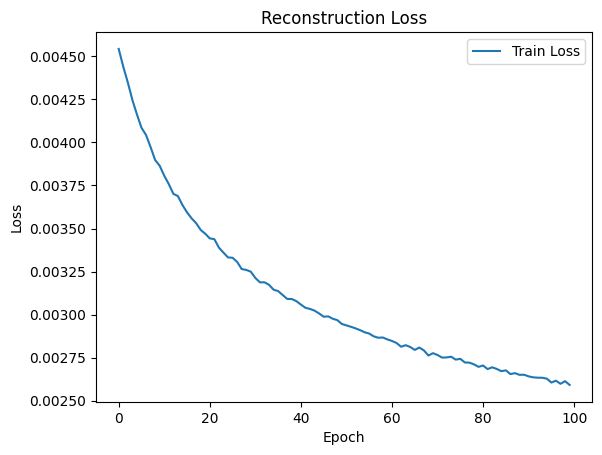

In [ ]:
plt.plot(history.history['loss'], label='Train Loss')
plt.title('Reconstruction Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

#### Generate Images

In [ ]:
# Generate new images using the trained autoencoder
latent_samples = np.random.normal(size=(10, latent_dim))  # Generate random samples in the latent space
generated_imgs = decoder.predict(latent_samples)

1/1 [==============================] - 0s 43ms/step


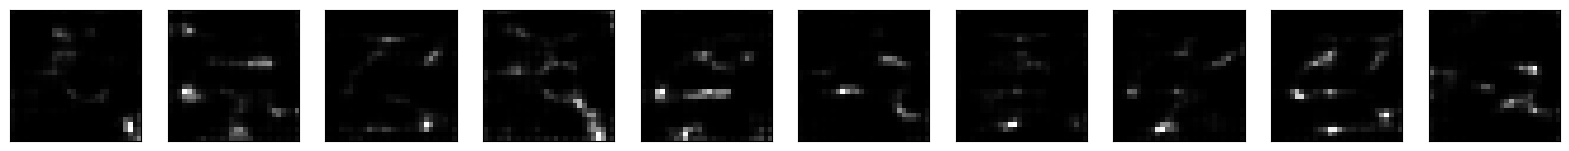

In [ ]:
# Visualize generated images
n = 10  # Number of images to display
plt.figure(figsize=(20, 4))

for i in range(n):
    ax = plt.subplot(1, n, i + 1)
    plt.imshow(generated_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Dense

# Load and preprocess the MNIST dataset
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import mnist
import numpy as np
# Define the autoencoder model
input_size = 784  # 28x28 pixels
encoding_dim = 32  # Size of the encoded representation

input_img = Input(shape=(28, 28, 1))

# Encoder
x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# Decoder
x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x =  ((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

# Create the autoencoder model
autoencoder = Model(input_img, decoded)

# Compile the model
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_15 (Conv2D)          (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 14, 14, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 14, 14, 8)         1160      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 7, 7, 8)           0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 7, 7, 8)           584 

In [ ]:
# Train the autoencoder
autoencoder.fit(x_train, x_train, epochs=10, batch_size=128, shuffle=True, validation_data=(x_test, x_test))


Epoch 1/10
469/469 [==============================] - 7s 8ms/step - loss: 0.2174 - val_loss: 0.1458
Epoch 2/10
469/469 [==============================] - 5s 10ms/step - loss: 0.1363 - val_loss: 0.1276
Epoch 3/10
469/469 [==============================] - 4s 8ms/step - loss: 0.1236 - val_loss: 0.1200
Epoch 4/10
469/469 [==============================] - 3s 6ms/step - loss: 0.1171 - val_loss: 0.1136
Epoch 5/10
469/469 [==============================] - 3s 6ms/step - loss: 0.1131 - val_loss: 0.1106
Epoch 6/10
469/469 [==============================] - 3s 6ms/step - loss: 0.1103 - val_loss: 0.1080
Epoch 7/10
469/469 [==============================] - 3s 7ms/step - loss: 0.1084 - val_loss: 0.1064
Epoch 8/10
469/469 [==============================] - 3s 6ms/step - loss: 0.1068 - val_loss: 0.1049
Epoch 9/10
469/469 [==============================] - 3s 6ms/step - loss: 0.1055 - val_loss: 0.1039
Epoch 10/10
469/469 [==============================] - 3s 6ms/step - loss: 0.1044 - val_loss: 0.102

In [ ]:
# Generate images using the trained autoencoder
decoded_imgs = autoencoder.predict(x_test)


313/313 [==============================] - 1s 2ms/step


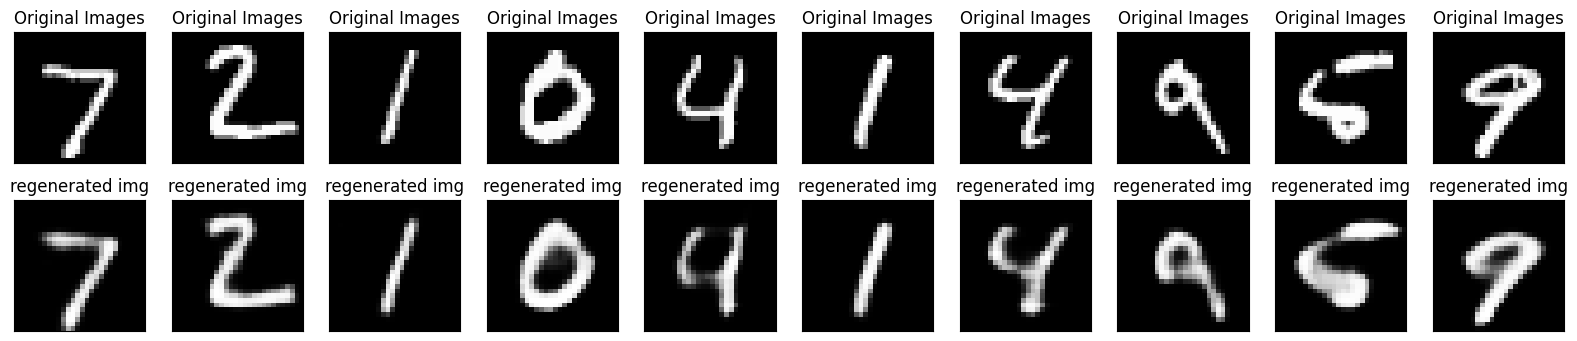

In [ ]:

# Visualize original and generated images
n = 10  # Number of digits to display
plt.figure(figsize=(20, 4))

for i in range(n):
    # Display original images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(test_data[i].reshape(28, 28))
    plt.gray()
    plt.title("Original Images")
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display generated images
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    plt.title("regenerated img")
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()
